### En el siguiente notebook se intentara determinar por descripcion de las peliculas si cuentan con estereotipos y donde se presentan mas repeticiones en su trama 

In [2]:
import pandas as pd

import numpy as np
 
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
 
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
 
import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display

In [3]:
datos = pd.read_excel("salida_scraping.xlsx")
datos.head()

,budget,company,country,director,genre,gross,name,rating,day_released,month_released,...,star,votes,writer,year,hashtag,name_roten,calificacion1,calificacion2,synopsis,ruta
0,100000000,Red Granite Pictures,USA,Martin Scorsese,Biography,116900694,The Wolf of Wall Street,R,25,12,...,Leonardo DiCaprio,895552,Terence Winter,2013,#TheWolfofWallStreet,the_wolf_of_wall_street,80.0,83.0,in 1987 jordan belfort leonardo dicaprio ta...,https://www.rottentomatoes.com/m/the_wolf_of_w...
1,20000000,New Line Cinema,USA,James Wan,Horror,137400141,The Conjuring,R,19,7,...,Patrick Wilson,342870,Chad Hayes,2013,#TheConjuring,the_conjuring,86.0,83.0,in 1970 paranormal investigators and demonolo...,https://www.rottentomatoes.com/m/the_conjuring
2,46000000,Alcon Entertainment,USA,Denis Villeneuve,Crime,61002302,Prisoners,R,20,9,...,Hugh Jackman,449489,Aaron Guzikowski,2013,#Prisoners,prisoners,81.0,87.0,keller dover hugh jackman faces a parent s w...,https://www.rottentomatoes.com/m/prisoners_2013
3,150000000,Walt Disney Animation Studios,USA,Chris Buck,Animation,400738009,Frozen,PG,27,11,...,Kristen Bell,464149,Jennifer Lee,2013,#Frozen,frozen,56.0,57.0,a performance artist turns his suicide into a ...,https://www.rottentomatoes.com/m/frozen
4,75000000,Summit Entertainment,USA,Louis Leterrier,Crime,117723989,Now You See Me,PG-13,31,5,...,Jesse Eisenberg,505432,Ed Solomon,2013,#NowYouSeeMe,now_you_see_me,51.0,70.0,charismatic magician atlas jesse eisenberg l...,https://www.rottentomatoes.com/m/now_you_see_me


In [4]:
agrupaciones=datos['genre'].unique()
agrupaciones

array(['Biography', 'Horror', 'Crime', 'Animation', 'Drama', 'Action',
       'Comedy', 'Adventure', 'Fantasy', 'Mystery', 'Sci-Fi', 'Romance',
       'Thriller', 'Western'], dtype=object)

In [5]:
def generar_grafico(datos,imagen):
    calabaza = PIL.Image.open(imagen)
    mask = np.array(calabaza)
    palabras = datos.synopsis.str.cat(sep=' ')
    wordcloud = WordCloud(width=800, height=400,
                         max_font_size=150, max_words=800,
                         background_color='black', 
                         colormap='copper_r',
                         stopwords=stopwords,
                         mask=mask, contour_width=0.5, contour_color='white').generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
                         #title= "Ejemplo"
    wordcloud.to_file(imagen)

    plt.figure(figsize=(10,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title="Ejemplo"
    return plt

# Peliculas 
graficos por clasificacion de peliculas

In [6]:
Biography=datos[datos['genre']=="Biography"]
Biography

,budget,company,country,director,genre,gross,name,rating,day_released,month_released,...,star,votes,writer,year,hashtag,name_roten,calificacion1,calificacion2,synopsis,ruta
0,100000000,Red Granite Pictures,USA,Martin Scorsese,Biography,116900694,The Wolf of Wall Street,R,25,12,...,Leonardo DiCaprio,895552,Terence Winter,2013,#TheWolfofWallStreet,the_wolf_of_wall_street,80.0,83.0,in 1987 jordan belfort leonardo dicaprio ta...,https://www.rottentomatoes.com/m/the_wolf_of_w...
13,20000000,Regency Enterprises,USA,Steve McQueen,Biography,56671993,12 Years a Slave,R,8,11,...,Chiwetel Ejiofor,503763,John Ridley,2013,#12YearsaSlave,12_years_a_slave,95.0,90.0,in the years before the civil war solomon nor...,https://www.rottentomatoes.com/m/12_years_a_slave
17,5000000,Truth Entertainment (II),USA,Jean-Marc Vallée,Biography,27298285,Dallas Buyers Club,R,22,11,...,Matthew McConaughey,362192,Craig Borten,2013,#DallasBuyersClub,dallas_buyers_club,93.0,91.0,in mid 1980s texas electrician ron woodroof ...,https://www.rottentomatoes.com/m/dallas_buyers...
60,55000000,Scott Rudin Productions,USA,Paul Greengrass,Biography,107100855,Captain Phillips,PG-13,11,10,...,Tom Hanks,354410,Billy Ray,2013,#CaptainPhillips,captain_phillips,93.0,89.0,in april 2009 the u s containership maersk a...,https://www.rottentomatoes.com/m/captain_phillips
78,40000000,Warner Bros.,USA,Brian Helgeland,Biography,95001343,42,PG-13,12,4,...,Chadwick Boseman,71006,Brian Helgeland,2013,#42,42,66.0,67.0,a drug addled manipulative misanthrope james...,https://www.rottentomatoes.com/m/filth_2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686,8000000,Shooting Script Films,UK,Roger Spottiswoode,Biography,35070,A Street Cat Named Bob,UNRATED,18,11,...,Luke Treadaway,16636,James Bowen,2016,#AStreetCatNamedBob,a_street_cat_named_bob,77.0,76.0,a stray ginger cat changes the life of james b...,https://www.rottentomatoes.com/m/a_street_cat_...
687,0,Desert Wolf Productions,UK,Michael Grandage,Biography,1358018,Genius,PG-13,10,6,...,Colin Firth,12252,John Logan,2016,#Genius,genius,53.0,46.0,NaN,https://www.rottentomatoes.com/m/genius_2016
688,8500000,Bron Studios,USA,Nate Parker,Biography,15858754,The Birth of a Nation,R,7,10,...,Nate Parker,14778,Nate Parker,2016,#TheBirthofaNation,the_birth_of_a_nation,73.0,71.0,nat turner is an enslaved baptist preacher who...,https://www.rottentomatoes.com/m/the_birth_of_...
693,13000000,Columbia Pictures,USA,Patricia Riggen,Biography,61693523,Miracles from Heaven,PG,16,3,...,Jennifer Garner,13373,Christy Beam,2016,#MiraclesfromHeaven,miracles_from_heaven,45.0,81.0,anna beam kylie rogers lives with a rare in...,https://www.rottentomatoes.com/m/miracles_from...


# Biography

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

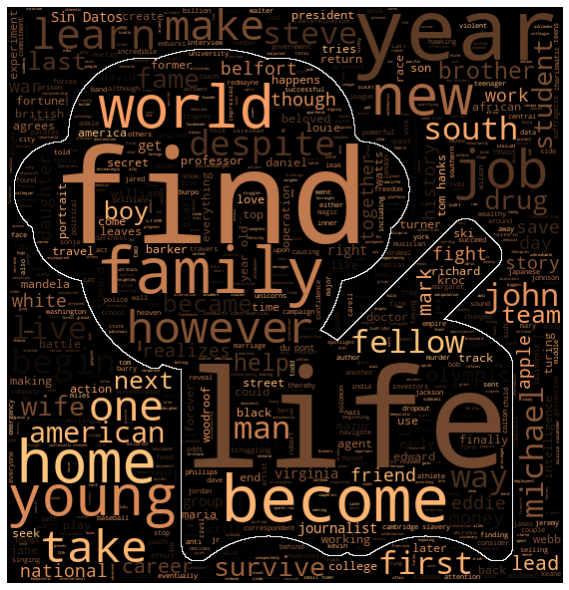

In [7]:
Biography=datos[datos['genre']=="Biography"]
generar_grafico(Biography,"Biography.png")

# Thriller

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

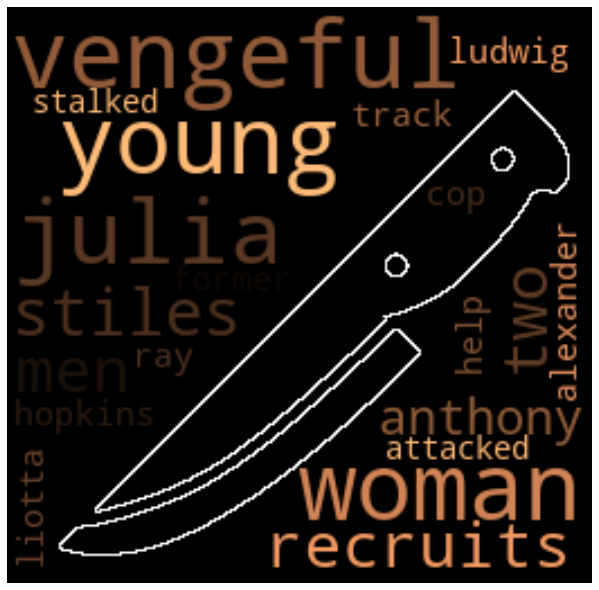

In [8]:
Biography=datos[datos['genre']=="Thriller"]
generar_grafico(Biography,"Thriller.png")

# Horror

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

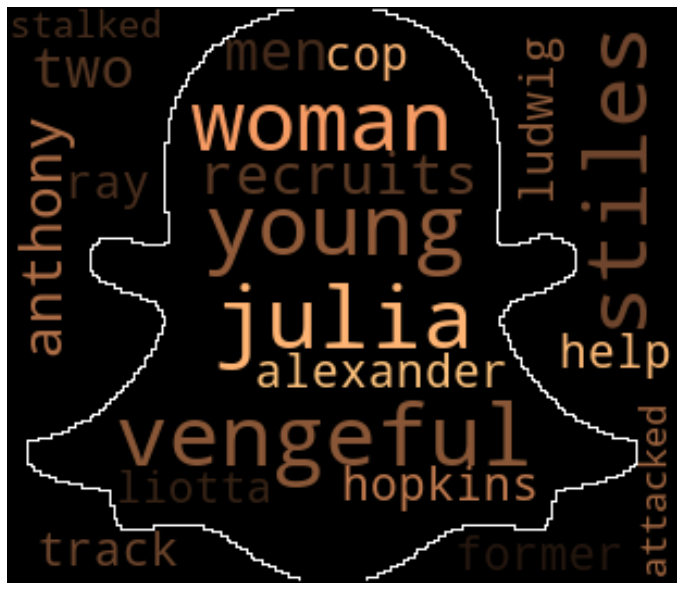

In [9]:
# Biography=datos[datos['genre']=="Horror"]
generar_grafico(Biography,"Horror.png")

# Crime

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

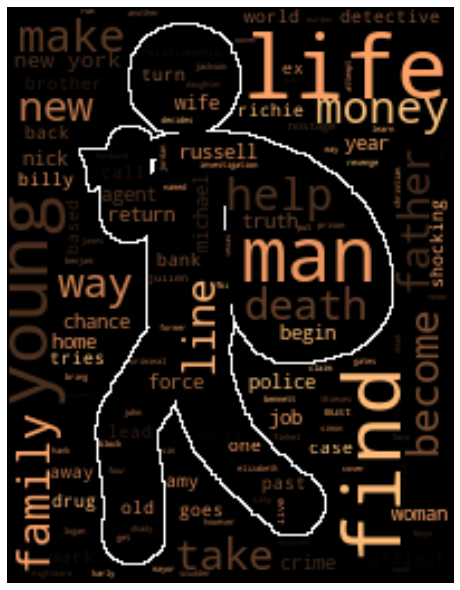

In [10]:
Biography=datos[datos['genre']=="Crime"]
generar_grafico(Biography,"Crime.png")

# Animation

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

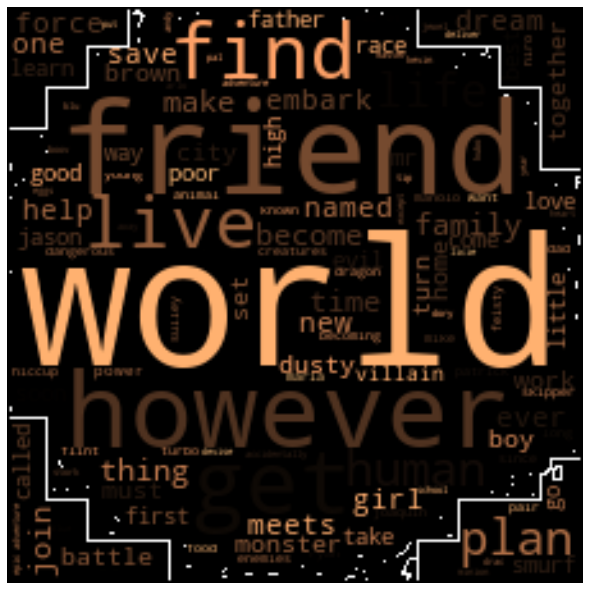

In [11]:
Biography=datos[datos['genre']=="Animation"]
generar_grafico(Biography,"Animation.png")

# Drama

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

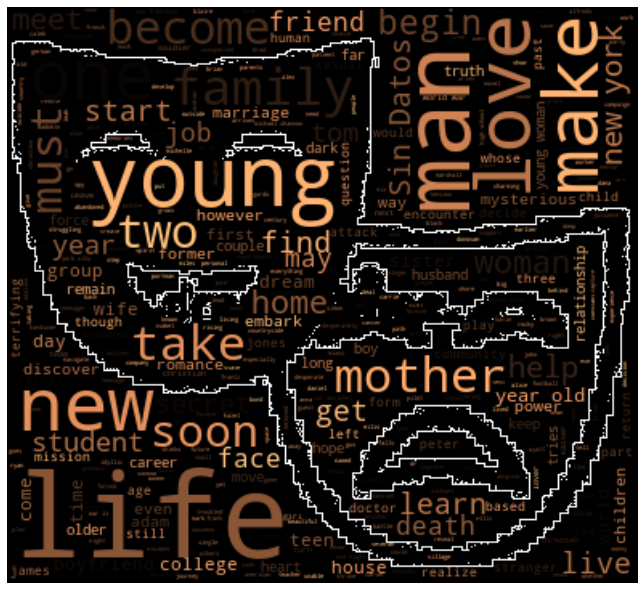

In [12]:
Biography=datos[datos['genre']=="Drama"]
generar_grafico(Biography,"Drama.png")

# Action

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

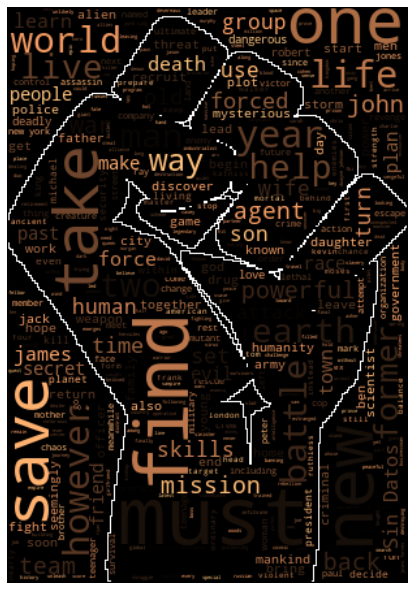

In [13]:
Biography=datos[datos['genre']=="Action"]
generar_grafico(Biography,"Action.png")

# Comedy

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

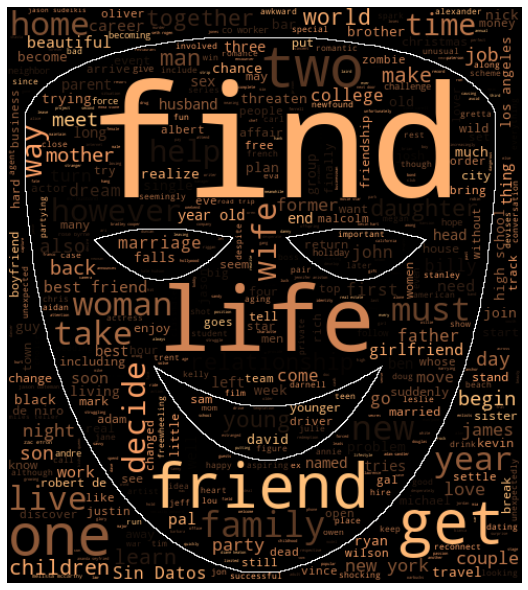

In [14]:
Biography=datos[datos['genre']=="Comedy"]
generar_grafico(Biography,"Comedy.png")

# Adventure

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

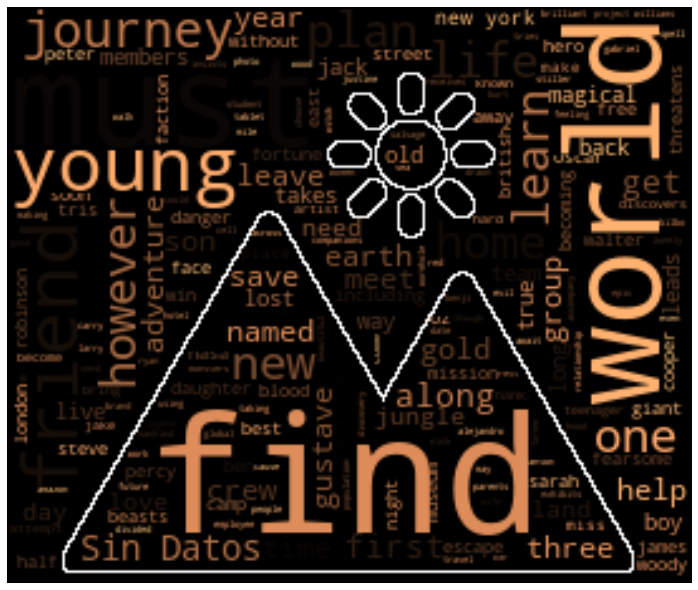

In [15]:
Biography=datos[datos['genre']=="Adventure"]
generar_grafico(Biography,"Adventure.png")

# Fantasy

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

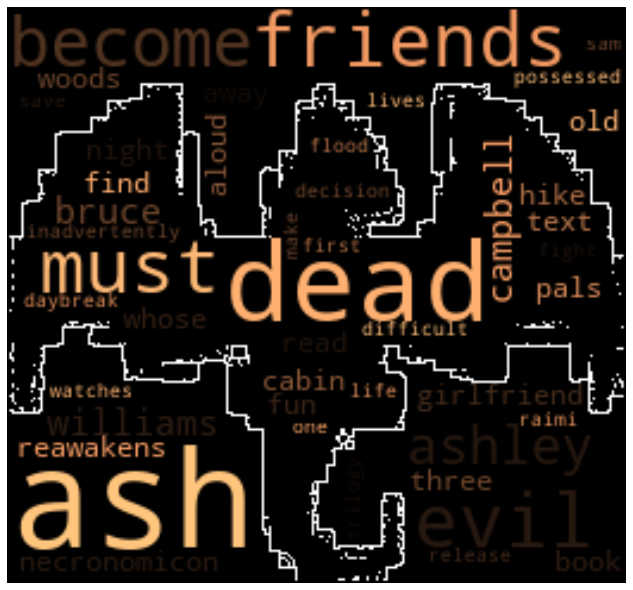

In [16]:
Biography=datos[datos['genre']=="Fantasy"]
generar_grafico(Biography,"Fantasy.png")

# Mystery

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

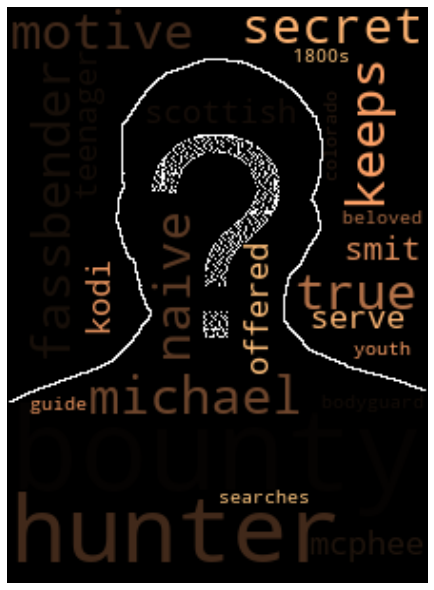

In [21]:
# Biography=datos[datos['genre']=="Mystery"]
generar_grafico(Biography,"Mystery.png")

# Sci-Fi

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

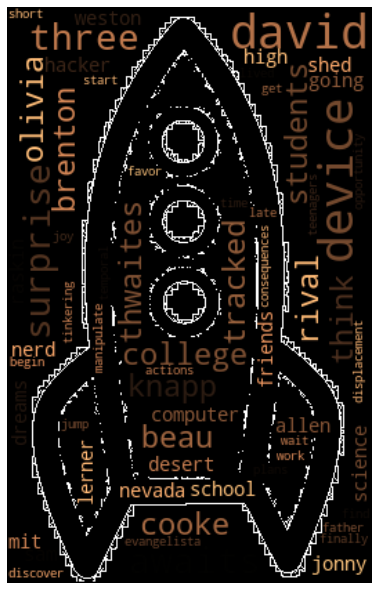

In [18]:
Biography=datos[datos['genre']=="Sci-Fi"]
generar_grafico(Biography,"Sci-Fi.png")

# Romance

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

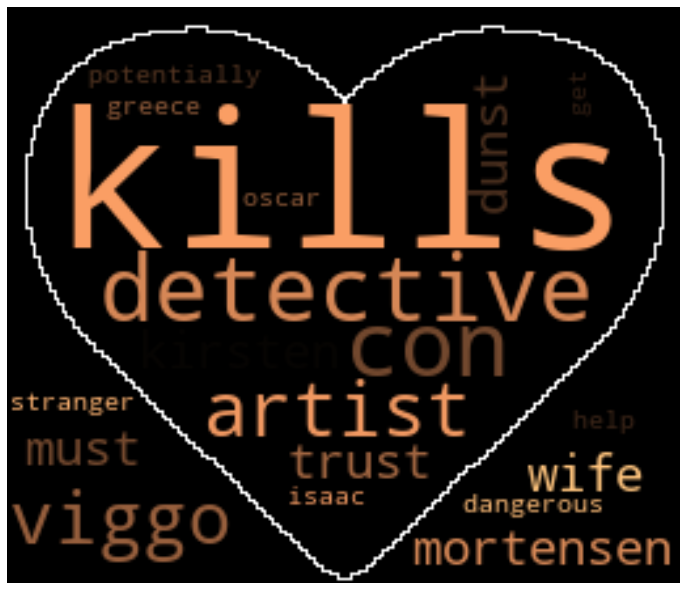

In [19]:
Biography=datos[datos['genre']=="Romance"]
generar_grafico(Biography,"Romance.png")

# Western

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

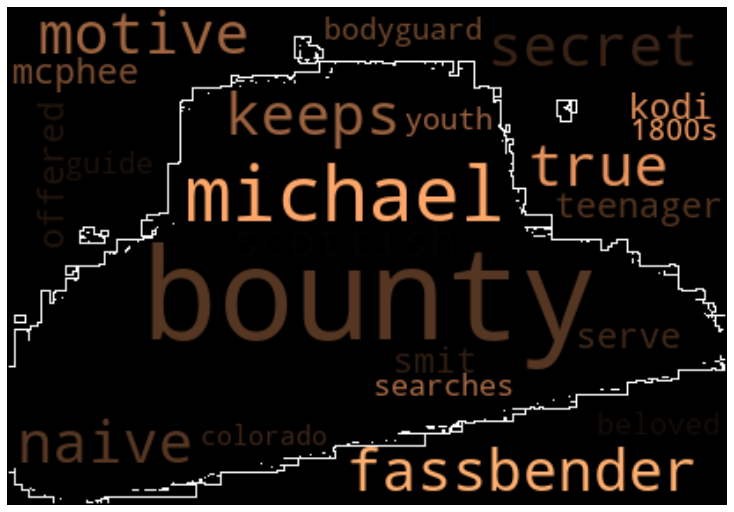

In [20]:
Biography=datos[datos['genre']=="Western"]
generar_grafico(Biography,"Western.png")